In [1]:
#importing the library

In [320]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


In [321]:
#importing data
nifty=pd.read_csv('nifty_latest.csv')
nifty.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
240,2021-11-08,18040.199219,18087.800781,17836.099609,18068.550781,18068.550781,338900.0
241,2021-11-09,18084.349609,18112.599609,17983.050781,18044.250000,18044.250000,270200.0
242,2021-11-10,17973.449219,18061.250000,17915.000000,18017.199219,18017.199219,261400.0
243,2021-11-11,17967.449219,17971.349609,17798.199219,17873.599609,17873.599609,232100.0
244,2021-11-12,17977.599609,18123.000000,17905.900391,18102.750000,18102.750000,249100.0


In [322]:
obv=[]
obv.append(0)
#Loop through the data set from the second row (index 1 ) to the end of the dataset
for i in range(1,len(nifty.index)):
    if nifty['Close'][i]>nifty['Close'][i-1]:
        obv.append(obv[-1]+nifty.Volume[i])
    elif nifty.Close[i]<nifty.Close[i-1]:
        obv.append(obv[-1]-nifty.Volume[i])
    else:
        obv.append(obv[-1])
        
        
#Storing the obv and obv exponential moving average(ema ) into new columns:
nifty['obv']=obv
nifty['obv_ema']=nifty['obv'].ewm(span=20).mean()


In [323]:
#Create a variable to predict 'x' days out into the future
future_days=10
#Create a new column (target) shifted 'x' up
nifty['Prediction']=nifty[['Adj Close']].shift(-future_days)


In [324]:
nifty

,Date,Open,High,Low,Close,Adj Close,Volume,obv,obv_ema,Prediction
0,2020-11-17,12932.500000,12934.049805,12797.099609,12874.200195,12874.200195,707700.0,0.0,0.000000e+00,13113.750000
1,2020-11-18,12860.099609,12948.849609,12819.349609,12938.250000,12938.250000,731300.0,731300.0,3.839325e+05,13133.900391
2,2020-11-19,12839.500000,12963.000000,12745.750000,12771.700195,12771.700195,768800.0,-37500.0,2.291850e+05,13258.549805
3,2020-11-20,12813.400391,12892.450195,12730.250000,12859.049805,12859.049805,664000.0,626500.0,3.438837e+05,13355.750000
4,2020-11-23,12960.299805,12968.849609,12825.700195,12926.450195,12926.450195,633100.0,1259600.0,5.653877e+05,13392.950195
...,...,...,...,...,...,...,...,...,...,...
240,2021-11-08,18040.199219,18087.800781,17836.099609,18068.550781,18068.550781,338900.0,19187800.0,1.960523e+07,NaN
241,2021-11-09,18084.349609,18112.599609,17983.050781,18044.250000,18044.250000,270200.0,18917600.0,1.953974e+07,NaN
242,2021-11-10,17973.449219,18061.250000,17915.000000,18017.199219,18017.199219,261400.0,18656200.0,1.945559e+07,NaN
243,2021-11-11,17967.449219,17971.349609,17798.199219,17873.599609,17873.599609,232100.0,18424100.0,1.935736e+07,NaN


In [330]:
latest_obv=nifty['obv'].tail(3)
print(latest_obv)
latest_close=nifty['Close'].tail(3)
print(latest_close)

242    18656200.0
243    18424100.0
244    18673200.0
Name: obv, dtype: float64
242    18017.199219
243    17873.599609
244    18102.750000
Name: Close, dtype: float64


In [278]:

nifty = nifty[nifty['Prediction'].notna()]

In [279]:
x=nifty['obv']#feature data dataset
x=np.array(x)
y=nifty['Prediction']
y=np.array(y)
print(x.shape)
print(y.shape)
x=x.reshape(-1,1)
print(x.shape)

(233,)
(233,)
(233, 1)


In [280]:
#spliting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
x_train=x_train.reshape(-1,1)

In [281]:
#Create the model
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [282]:
#Create the predictions on the test data
prediction=model.predict(x_test)
#print the prediction
print(prediction)
prediction_train=model.predict(x_train)
print(prediction_train)





[17443.54355003 17138.03940835 12663.06029146 14888.63099294
 16451.29530245 14521.9933312  17389.00286056 16182.59659107
 15016.72805681 15641.11270307 15092.27317763 13343.810915
 17677.69800854 14904.86788151 16207.85094628 16167.58564207
 17306.56523503 12311.1883908  14753.06931923 16096.91703644
 14834.71689481 17210.96919141 14773.33818684 14888.63099294]
[15026.09968377 15417.44683868 16271.49083169 15526.60994692
 14921.05028388 17138.47529797 14215.42670856 16461.59319487
 17563.63114201 15301.60917055 16073.70591386 16314.09904264
 15019.64306868 17139.75572375 14882.17437785 16202.67475697
 17273.08346313 15027.89772847 15182.99270605 14987.38723635
 14724.70925043 14469.27792955 15851.75636487 15395.40716947
 12153.88672199 16319.60214917 16202.12989494 17252.86908172
 15774.05903902 13329.97141937 14678.9953259  15179.77802006
 13544.56533091 16527.63047322 14887.24159476 15404.3156637
 16092.8850574  13480.73474379 15916.26802953 14750.50846767
 16615.32601737 17200.8075

In [283]:
error_score=metrics.r2_score(y_test,prediction)
print(error_score)

error_score_train=metrics.r2_score(y_train,prediction_train)
print(error_score_train)

0.8669605643545966
0.8413440294949454


In [284]:
x_train.shape

(209, 1)

In [285]:
y_train.shape


(209,)

In [264]:
print(y_test)
print(prediction)

[15885.150391 14724.799805 14653.049805 15727.900391 13682.700195
 14789.950195 14696.5      18338.550781 17711.300781 15834.349609
 15632.099609 15574.849609 14867.349609 18477.050781 14942.349609
 14919.099609 15097.349609 13558.150391 17519.449219 15924.200195
 13133.900391 14238.900391 17855.099609 13873.200195]
[16165.11703312 15182.97698378 15004.24484152 16294.77403989
 12609.92689542 15213.54156563 15422.22866073 17153.54734546
 17330.39517987 16197.39966037 16095.89642981 15699.66528218
 14903.96086898 17068.80891274 15170.3964578  15217.83667912
 15429.6273401  12249.3313346  17177.2120353  16076.38830141
 12302.36905868 14820.52482551 17158.97858575 13503.86471084]


<bound method NDFrame.tail of            Date          Open          High           Low         Close  \
1    2020-11-18  12860.099609  12948.849609  12819.349609  12938.250000   
2    2020-11-19  12839.500000  12963.000000  12745.750000  12771.700195   
3    2020-11-20  12813.400391  12892.450195  12730.250000  12859.049805   
4    2020-11-23  12960.299805  12968.849609  12825.700195  12926.450195   
5    2020-11-24  13002.599609  13079.099609  12978.000000  13055.150391   
..          ...           ...           ...           ...           ...   
230  2021-10-22  18230.699219  18314.250000  18034.349609  18114.900391   
231  2021-10-25  18229.500000  18241.400391  17968.500000  18125.400391   
232  2021-10-26  18154.500000  18310.449219  18099.300781  18268.400391   
233  2021-10-27  18295.849609  18342.050781  18167.900391  18210.949219   
234  2021-10-28  18187.650391  18190.699219  17799.449219  17857.250000   

        Adj Close    Volume         obv       obv_ema    Prediction  

In [331]:
Current_Price=latest_obv
x_train=[Current_Price]
x_train=np.array(x_train)
x_train=x_train.reshape(-1,1)
latest_prediction=model.predict(x_train)
latest_prediction

array([17246.63041144, 17183.39917256, 17251.26173872])

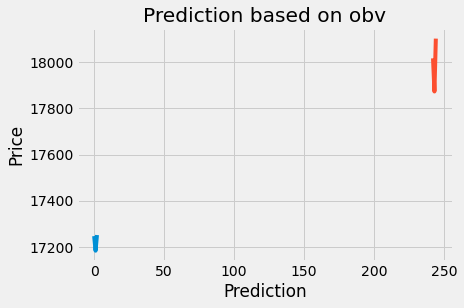

In [332]:
current_price=latest_close
plt.plot(latest_prediction)
plt.plot(current_price)
plt.ylabel('Price')
plt.xlabel('Prediction')
plt.title('Prediction based on obv')
plt.show()

In [316]:
#Red Line is current price
#Blue Line is prediction after 10 days

In [318]:
nifty.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume,obv,obv_ema,Prediction
230,2021-10-22,18230.699219,18314.250000,18034.349609,18114.900391,18114.900391,324700.0,19819800.0,1.959111e+07,18068.550781
231,2021-10-25,18229.500000,18241.400391,17968.500000,18125.400391,18125.400391,418700.0,20238500.0,1.965276e+07,18044.250000
232,2021-10-26,18154.500000,18310.449219,18099.300781,18268.400391,18268.400391,341400.0,20579900.0,1.974106e+07,18017.199219
233,2021-10-27,18295.849609,18342.050781,18167.900391,18210.949219,18210.949219,335200.0,20244700.0,1.978903e+07,17873.599609
234,2021-10-28,18187.650391,18190.699219,17799.449219,17857.250000,17857.250000,374200.0,19870500.0,1.979679e+07,18102.750000
